![image.png](attachment:image.png)

# Regressão III - Tarefa

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.interpolate import interp1d # Vamos precisar dessa interpolação

from scipy.stats import pearsonr

In [2]:
# Carregando os dados
df = pd.read_csv('./data/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
# Verificando banco
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [4]:
# Copiando a df original apenas as colunas de interesse
df_copy = df[['tempo_emprego','renda']].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tempo_emprego  624240 non-null  float64
 1   renda          750000 non-null  float64
dtypes: float64(2)
memory usage: 17.2+ MB


In [5]:
# Verificando missings na renda
df_copy['renda'].isna().sum()

0

In [6]:
# Verificando missing no tempo de emprego
df_copy['tempo_emprego'].isna().sum()

125760

In [7]:
# Substituindo os valores faltantes pela média
df_copy.fillna({'tempo_emprego': np.mean(df_copy['tempo_emprego'])}, inplace=True)
df_copy = df_copy.sort_values('renda')

# Verificando missing no tempo de emprego
df_copy['tempo_emprego'].isna().sum()

0

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [8]:
# Resetando o index da df
df_copy.reset_index(inplace=True)

# Definindo a data_ref como datetime
df_copy['data_ref'] = pd.to_datetime(df_copy['data_ref'])

# Obtendo o log da renda
df_copy['renda_log'] = np.log(df_copy['renda'])

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   data_ref       750000 non-null  datetime64[ns]
 1   tempo_emprego  750000 non-null  float64       
 2   renda          750000 non-null  float64       
 3   renda_log      750000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 22.9 MB


In [9]:
# Obtendo o conjunto de teste
df_copy_test = df_copy[df_copy['data_ref'] <= "2015-04-01"]

# Obtendo o conjunto de treino
df_copy_train = df_copy[df_copy['data_ref'] > "2015-04-01"]

print(df_copy_test.shape)
print(df_copy_train.shape)

(200000, 4)
(550000, 4)


### Primeiro modelo
Prever a renda em seu log. Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

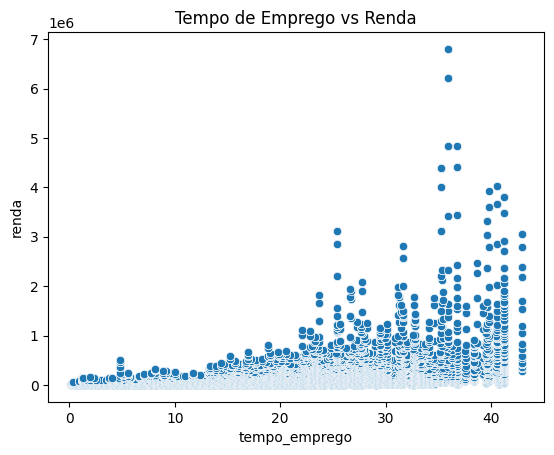

In [10]:
plt.title("Tempo de Emprego vs Renda")
sns.scatterplot(
    x="tempo_emprego",
    y="renda",
    data=df_copy_train
)
plt.show()

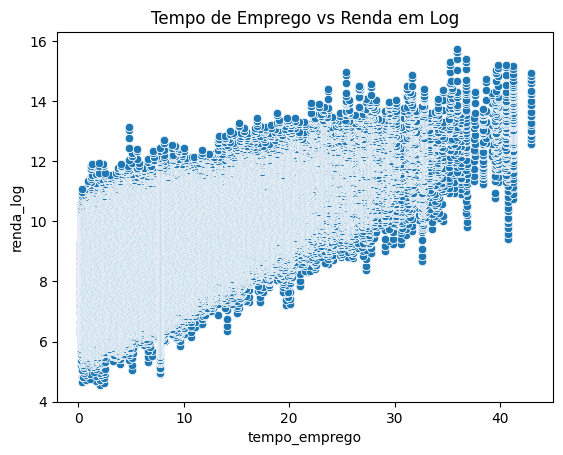

In [11]:
plt.title("Tempo de Emprego vs Renda em Log")
sns.scatterplot(
    x="tempo_emprego",
    y="renda_log",
    data=df_copy_train
)
plt.show()

In [12]:
# Obtendo o modelo de renda em log usando o tempo de emprego
reg = smf.ols("renda_log ~ tempo_emprego", data=df_copy_train).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 3.036e+05
Date:                Sat, 28 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:05:51   Log-Likelihood:            -8.1159e+05
No. Observations:              550000   AIC:                         1.623e+06
Df Residuals:                  549998   BIC:                         1.623e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.1304      0.002   3520.596      0.000       8.126       8.135
tempo_emprego     0.1293      0.000    551.013      0.000       0.129       0.130
==============================================================================
Omnibus:                     5854.794   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4269.782
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                       2.635   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(f"R-squared: {reg.rsquared:.4f}")

R-squared: 0.3557


In [14]:
def esp_vs_obs(res, data, X1, y):
    pred_ols = res.get_prediction(data)
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]

    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    _, ax = plt.subplots(figsize=(8, 6))

    plt.title("Estimativas")
    ax.plot(data[X1], data[y], "o", label="Dados observados")
    ax.plot(data[X1], res.predict(data), "r--.", label="Estimativa OLS")
    ax.plot(data[X1], iv_u, "r--", label = 'Banda de confiança para y')
    ax.plot(data[X1], iv_l, "r--")
    ax.plot(data[X1], m_u, "g:", label='Banda de confiança para a média')
    ax.plot(data[X1], m_l, "g:")
    ax.legend(loc="best")
    plt.xlabel(X1)
    plt.ylabel(y)
    plt.show

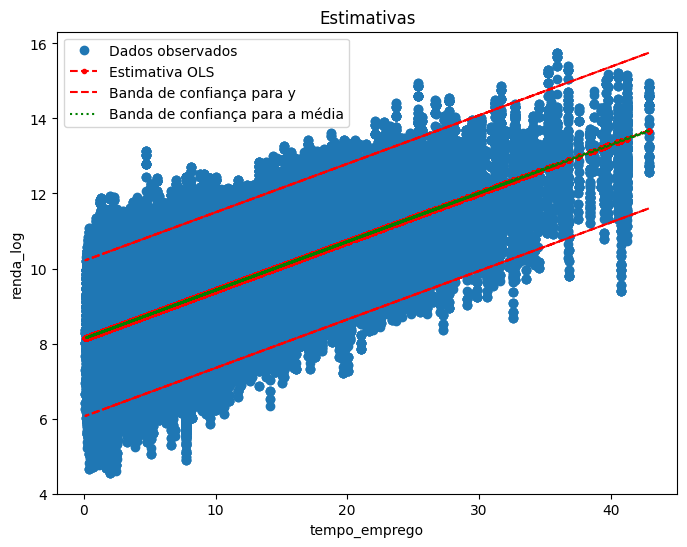

In [15]:
dic_parametros = {
    "res": reg,
    "data": df_copy_train,
    "X1": 'tempo_emprego',
    "y": 'renda_log',
}
esp_vs_obs(**dic_parametros)

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [16]:
# Inserindo as informações adicionais das estimativas de renda
df_copy['tempo_emprego_cat'], quebras = pd.qcut(df_copy['tempo_emprego'], 10, duplicates='drop', retbins=True)

renda_med = pd.DataFrame()
renda_med['renda_log'] = df_copy.groupby('tempo_emprego_cat', observed=False)['renda_log'].mean()
renda_med['renda_min'] = renda_med['renda_log'] - 2*df_copy.groupby('tempo_emprego_cat', observed=False)['renda_log'].sem()
renda_med['renda_max'] = renda_med['renda_log'] + 2*df_copy.groupby('tempo_emprego_cat', observed=False)['renda_log'].sem()

renda_med.rename(columns={'renda_log':'renda_med'}, inplace=True)
# renda_med.columns = []

tab = df_copy.merge(renda_med, on='tempo_emprego_cat', how='left')
tab.head()

,data_ref,tempo_emprego,renda,renda_log,tempo_emprego_cat,renda_med,renda_min,renda_max
0,2016-03-01,2.013699,95.30,4.55703,"(1.458, 2.912]",8.3626,8.355156,8.370044
1,2016-03-01,2.013699,95.30,4.55703,"(1.458, 2.912]",8.3626,8.355156,8.370044
2,2016-03-01,2.013699,95.30,4.55703,"(1.458, 2.912]",8.3626,8.355156,8.370044
3,2016-03-01,2.013699,95.30,4.55703,"(1.458, 2.912]",8.3626,8.355156,8.370044
4,2016-03-01,2.452055,100.04,4.60557,"(1.458, 2.912]",8.3626,8.355156,8.370044


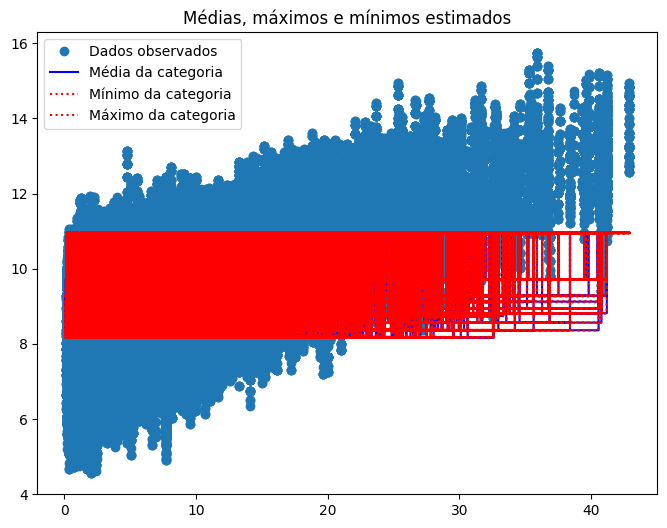

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.title("Médias, máximos e mínimos estimados")
ax.plot(tab['tempo_emprego'], tab['renda_log'], "o", label="Dados observados", alpha=1)
ax.step(tab['tempo_emprego'], tab['renda_med'], "b-", label="Média da categoria", alpha=1)
ax.step(tab['tempo_emprego'], tab['renda_min'], "r:", label="Mínimo da categoria", alpha=1)
ax.step(tab['tempo_emprego'], tab['renda_max'], "r:", label="Máximo da categoria", alpha=1)
ax.legend()
plt.show()

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


#### Transformação

##### Original

R-squared: 0.3557


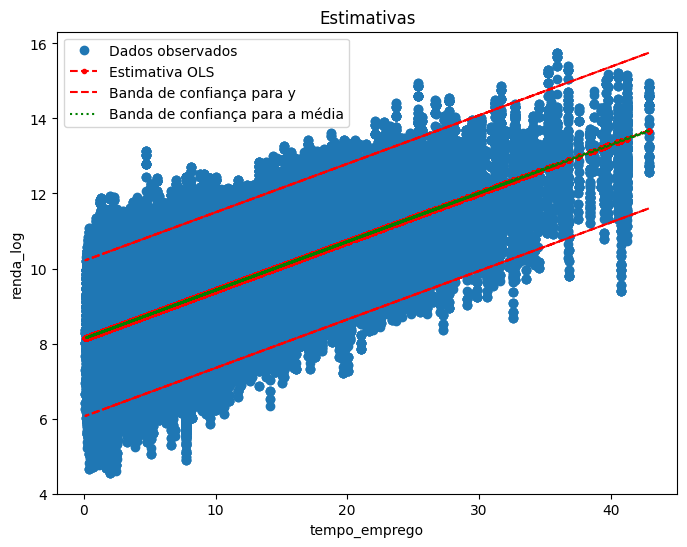

In [18]:
# Dados originais
reg = smf.ols("renda_log ~ tempo_emprego", data=df_copy_train).fit()
print(f"R-squared: {reg.rsquared:.4f}")
dic_parametros = {
    "res": reg,
    "data": df_copy_train,
    "X1": 'tempo_emprego',
    "y": 'renda_log',
}
esp_vs_obs(**dic_parametros)

##### Log

R-squared: 0.2391


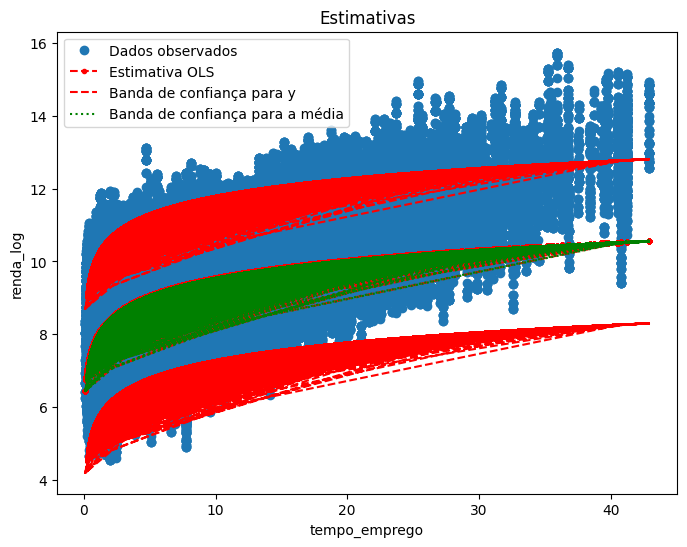

In [19]:
reg = smf.ols("renda_log ~ I(np.log(tempo_emprego))", data=df_copy_train).fit()
print(f"R-squared: {reg.rsquared:.4f}")
dic_parametros = {
    "res": reg,
    "data": df_copy_train,
    "X1": 'tempo_emprego',
    "y": 'renda_log',
}
esp_vs_obs(**dic_parametros)

##### Exponencial

R-squared: 0.3040


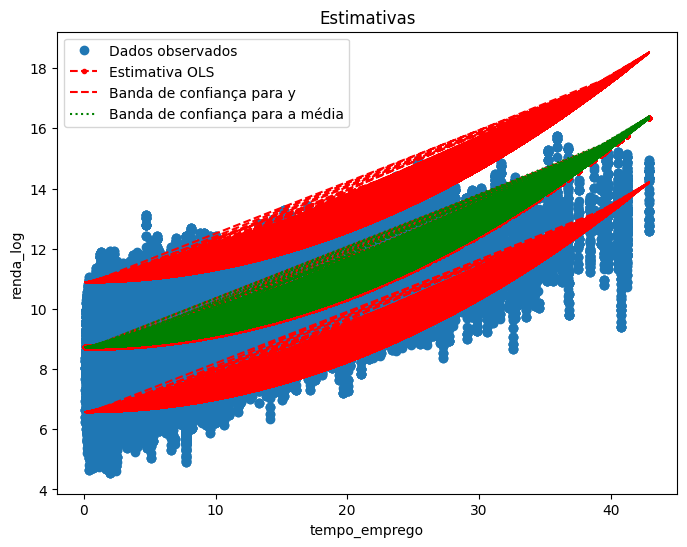

In [20]:
reg = smf.ols("renda_log ~ I(tempo_emprego**2)", data=df_copy_train).fit()
print(f"R-squared: {reg.rsquared:.4f}")
dic_parametros = {
    "res": reg,
    "data": df_copy_train,
    "X1": 'tempo_emprego',
    "y": 'renda_log',
}
esp_vs_obs(**dic_parametros)

##### Função

R-squared: 0.3425


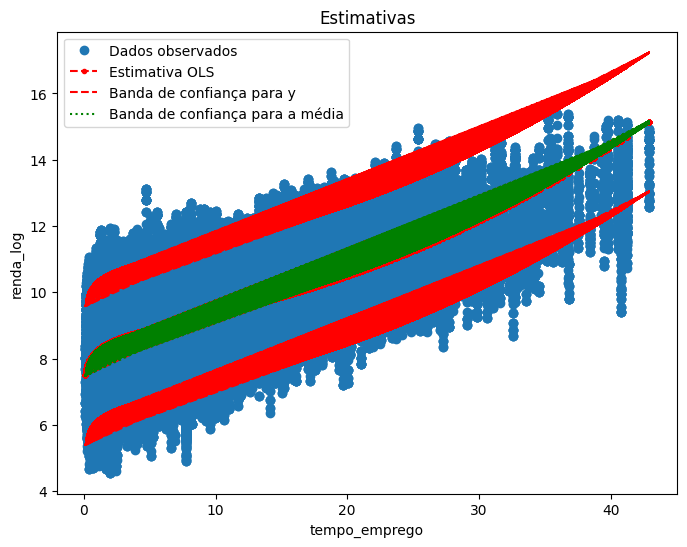

In [21]:
reg = smf.ols("renda_log ~ I(tempo_emprego**2) + I(np.log(tempo_emprego))", data=df_copy_train).fit()
print(f"R-squared: {reg.rsquared:.4f}")
dic_parametros = {
    "res": reg,
    "data": df_copy_train,
    "X1": 'tempo_emprego',
    "y": 'renda_log',
}
esp_vs_obs(**dic_parametros)

#### Lowess

In [22]:
df_copy_train.head()

,data_ref,tempo_emprego,renda,renda_log
0,2016-03-01,2.013699,95.30,4.55703
1,2016-03-01,2.013699,95.30,4.55703
2,2016-03-01,2.013699,95.30,4.55703
3,2016-03-01,2.013699,95.30,4.55703
4,2016-03-01,2.452055,100.04,4.60557


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


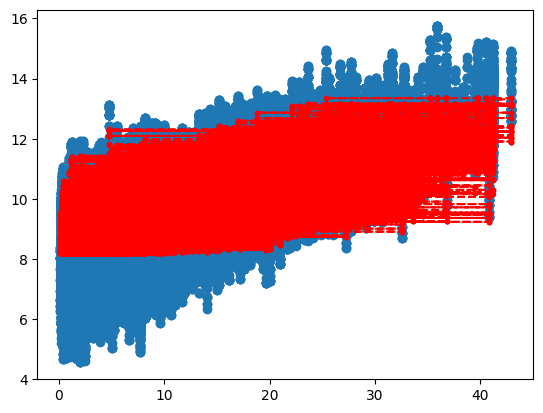

In [23]:
# Define a suavização dos dados na variável lowess
lowess = sm.nonparametric.lowess(df_copy_train['renda_log'], df_copy_train['tempo_emprego'], frac=1/9)

# Valores de Y suavizados
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]

# Gráfico
fig, ax = plt.subplots()

ax.plot(df_copy_train['tempo_emprego'], df_copy_train['renda_log'], "o", label="Dados observados", alpha=1)
ax.plot(df_copy_train['tempo_emprego'], lowess_y, "r--.", label="Lowess")
plt.show()

In [24]:
# Roda a interpolação do scipy
f = interp1d(lowess_x, lowess_y, bounds_error=False)

df_copy_train.loc[:, 'tempo_emprego_lowess'] = f(df_copy_train['tempo_emprego'])
df_copy_train.head()

<ipython-input-24-90a244f10ce2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_train.loc[:, 'tempo_emprego_lowess'] = f(df_copy_train['tempo_emprego'])


,data_ref,tempo_emprego,renda,renda_log,tempo_emprego_lowess
0,2016-03-01,2.013699,95.30,4.55703,8.438089
1,2016-03-01,2.013699,95.30,4.55703,8.438089
2,2016-03-01,2.013699,95.30,4.55703,8.438089
3,2016-03-01,2.013699,95.30,4.55703,8.438089
4,2016-03-01,2.452055,100.04,4.60557,8.496736


In [25]:
reg = smf.ols("renda_log ~ tempo_emprego_lowess", data=df_copy_train).fit()

print(f"R-squared: {reg.rsquared:.4f}")

reg.summary()

R-squared: 0.3309


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              renda_log   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                 2.719e+05
Date:                Sat, 28 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:08:19   Log-Likelihood:            -8.2199e+05
No. Observations:              550000   AIC:                         1.644e+06
Df Residuals:                  549998   BIC:                         1.644e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3155      0.017     18.594      0.000       0.282       0.349
tempo_emprego_lowess     0.9527      0.002    521.478      0.000       0.949       0.956
==============================================================================
Omnibus:                     5074.397   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3907.425
Skew:                          -0.121   Prob(JB):                         0.00
Kurtosis:                       2.666   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

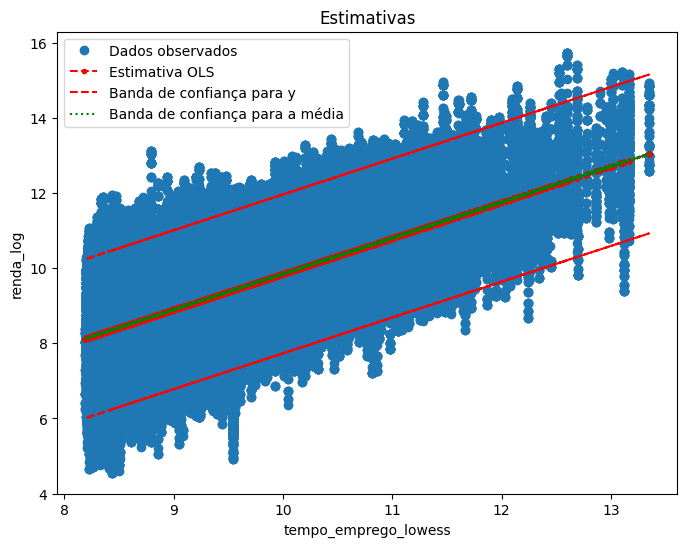

In [26]:
dic_parametros = {
    "res": reg,
    "data": df_copy_train,
    "X1": 'tempo_emprego_lowess',
    "y": 'renda_log',
}
esp_vs_obs(**dic_parametros)

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [27]:
# Define a suavização dos dados na variável lowess
lowess = sm.nonparametric.lowess(df_copy_test['renda_log'], df_copy_test['tempo_emprego'], frac=1/9)

# Valores de Y suavizados
lowess_x = lowess[:, 0]
lowess_y = lowess[:, 1]


# Roda a interpolação do scipy
f = interp1d(lowess_x, lowess_y, bounds_error=False)

df_copy_test.loc[:, 'tempo_emprego_lowess'] = f(df_copy_test['tempo_emprego'])
df_copy_test.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
<ipython-input-27-3fde3fc821c5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_test.loc[:, 'tempo_emprego_lowess'] = f(df_copy_test['tempo_emprego'])


,data_ref,tempo_emprego,renda,renda_log,tempo_emprego_lowess
44,2015-01-01,2.013699,141.25,4.950531,8.092099
46,2015-01-01,2.013699,141.25,4.950531,8.092099
47,2015-01-01,2.013699,141.25,4.950531,8.092099
48,2015-01-01,2.013699,141.25,4.950531,8.092099
50,2015-01-01,2.013699,141.25,4.950531,8.092099


In [28]:
df_copy_test['renda_log_pred'] = reg.predict(df_copy_test)
df_copy_test.head()

<ipython-input-28-19631a776394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_test['renda_log_pred'] = reg.predict(df_copy_test)


,data_ref,tempo_emprego,renda,renda_log,tempo_emprego_lowess,renda_log_pred
44,2015-01-01,2.013699,141.25,4.950531,8.092099,8.025166
46,2015-01-01,2.013699,141.25,4.950531,8.092099,8.025166
47,2015-01-01,2.013699,141.25,4.950531,8.092099,8.025166
48,2015-01-01,2.013699,141.25,4.950531,8.092099,8.025166
50,2015-01-01,2.013699,141.25,4.950531,8.092099,8.025166


In [29]:
r, p = pearsonr(df_copy_test['renda_log'], df_copy_test['renda_log_pred'])
print(f"Pearson: {r:.2f}\np-value: {p:.2f}")

Pearson: 0.59
p-value: 0.00


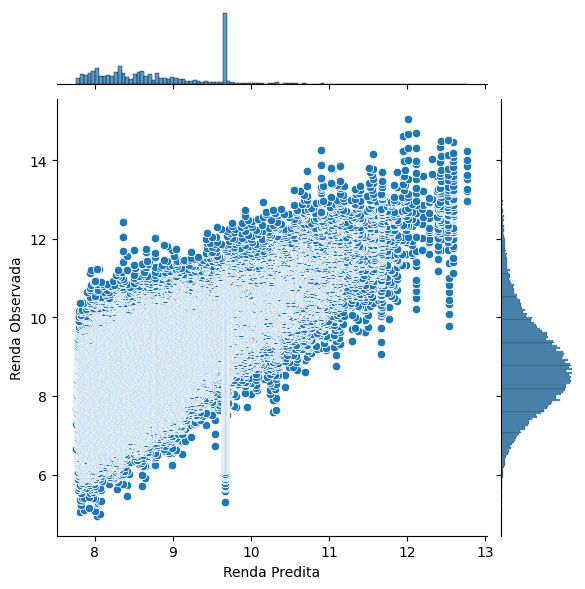

In [30]:
sns.jointplot(
    x='renda_log_pred',
    y='renda_log',
    data=df_copy_test,
)
plt.xlabel("Renda Predita")
plt.ylabel("Renda Observada")
plt.show()

## Conclussão
- O modelo padrão obteve R² de 0,3557, o melhor modelo obteve R² de 0,3309 com método Lowess.

- Na base de testes o modelo Lowess teve Pearson: 0,59 e p-value: 0.00